<a href="https://colab.research.google.com/github/notmylove/blogs/blob/master/tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 搭建一个关于计算机视觉的深度神经网络模型
这里有70000个Fashion MNIST数据，可以直接从TensorFlow中导入，这些数据集包含10中不同的衣服类型，每个image图像的像素是28*28，在0-255之间，60000个数据作为训练集，10000个数据作为测试集

In [0]:
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


调用plt.imshow()查看image图像，print某个index的image的像素值

In [0]:
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

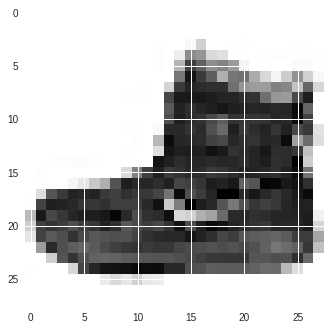

In [7]:
plt.imshow(train_images[0])
print(train_images[0], '\n', train_labels[0])


**像素值**在0-255之间，为了更好对神经网络模型进行训练，有必要对数据进行预处理，可以再把数据值变换到0-1之间，这就是正则化

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

构建一个**序列模型**，这里构建一个两层神经网络（多层感知器）模型，两层是指计算层为两层：

In [0]:
model = tf.keras.Sequential([keras.layers.Flatten(),
                            keras.layers.Dense(units=128, activation='relu'),
                            keras.layers.Dense(units=10, activation='softmax')])

**Dense**：加一层神经元

**activation**：激活函数，relu表示：$x=\begin{cases}x, \quad x\geq 0 \\ 0, \quad x< 0 \end{cases}$

[softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax)

构建好模型后，通过调用 compile 方法配置该模型的学习流程, fit方法来训练模型

In [17]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4776 - acc: 0.8324
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4625 - acc: 0.8376
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4506 - acc: 0.8416
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4407 - acc: 0.8460
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4325 - acc: 0.8484


In [21]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 42us/sample - loss: 4.6931 - acc: 0.7018


[4.693135403060913, 0.7018]

In [0]:
classifications = model.predict(test_images)

In [25]:
print(classifications[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [23]:
print(test_labels[0])

9


模型的输出是一个10个元素的列表，classifiactions[0]得到的一个列表，表示分别对应类别的概率

## 改变隐藏层中神经元的个数

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images/255.0, test_images/255.0
model = tf.keras.Sequential([keras.layers.Flatten(),
                            keras.layers.Dense(units=1024, activation='relu'),
                            keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classification = model.predict(test_images)
print(classification[0], '\n', test_labels[0])

**随着神经元个数的增加，计算量随之增大，最后预测结果的准确率会变高，但这不是无止境了，到了一定程度就可能会下降了**

## 把keras.layers.Flatten()去掉

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images/255.0, test_images/255.0
model = tf.keras.Sequential([keras.layers.Dense(units=1024, activation='relu'),
                            keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classification = model.predict(test_images)
print(classification[0], '\n', test_labels[0])

**程序运行时会显示数据形状错误，我们的数据是28x28图像，28层28个神经元是不可行的，因此将28,28个“平坦化”为784x1更有意义。 我们在开始时添加Flatten（）层，而不是自己处理所有代码，稍后将数组加载到模型中时，它们将自动为我们展平。**

## 增加计算层

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images/255.0, test_images/255.0
model = tf.keras.Sequential([keras.layers.Flatten(),
                            keras.layers.Dense(units=512, activation='relu'),
                            keras.layers.Dense(units=256, activation='relu')
                            keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classification = model.predict(test_images)
print(classification[0], '\n', test_labels[0])

##停止训练
当你想准确率达到理想值时停止训练，即95％的准确度可能对你来说足够了，如果在6次循环周期达到那个目标，为什么还要等待它完成更多的循环呢.所以你会如何解决这个问题？ 像任何其他程序一样......你有回调！

In [38]:
import tensorflow as tf
from tensorflow import keras


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print("\nReached 60% accuracy so cancelling train!")
      self.model.stop_train = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images/255.0, test_images/255.0
model = tf.keras.Sequential([keras.layers.Flatten(),
                            keras.layers.Dense(512, activation='relu'),
                            keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])




Epoch 1/5
60000/60000 [==============================] - 12s 202us/sample - loss: 0.4734
Epoch 2/5
59904/60000 [============================>.] - ETA: 0s - loss: 0.3576
Reached 60% accuracy so cancelling train!
60000/60000 [==============================] - 12s 192us/sample - loss: 0.3577
Epoch 3/5
59872/60000 [============================>.] - ETA: 0s - loss: 0.3239
Reached 60% accuracy so cancelling train!
60000/60000 [==============================] - 11s 188us/sample - loss: 0.3239
Epoch 4/5
59776/60000 [============================>.] - ETA: 0s - loss: 0.2991
Reached 60% accuracy so cancelling train!
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2991
Epoch 5/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.2793
Reached 60% accuracy so cancelling train!
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2796
